***2nd Question***

**Generate the dataset on your own containing 200 training instances and 200 test**

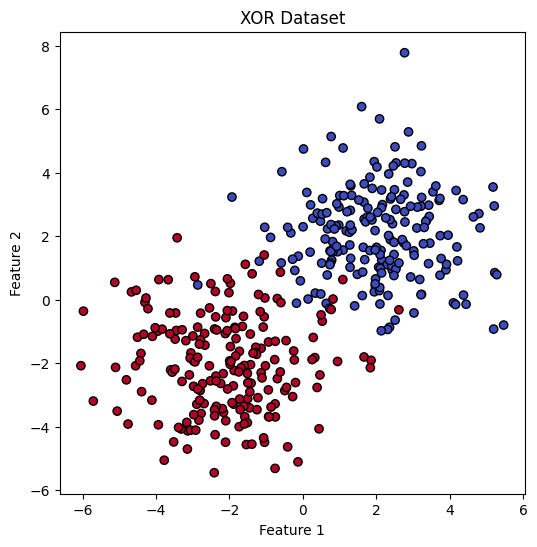

In [334]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(42)

# number of samples and centers
n_samples = 400
centers = 2

# parameters XOR Dataset
blob1_center = [2, 2]
blob2_center = [-2, -2]
blob_std = 1.5

# points for the first blob
blob1 = np.random.randn(n_samples // 2, 2) * blob_std + blob1_center

# points for the second blob
blob2 = np.random.randn(n_samples // 2, 2) * blob_std + blob2_center

# Combine the blobs into one dataset
X = np.vstack((blob1, blob2)).astype(np.float32)
y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2)).astype(np.float32)


# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("XOR Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**a) A MLP**

In [335]:
# Shuffle the dataset
indices = np.arange(n_samples)
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# train-test split (50% for training, 50% for testing)
split_index = n_samples // 2
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (200, 2) (200,)
Test set shape: (200, 2) (200,)


In [336]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Reshape for BCELoss
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: torch.Size([200, 2])
y_train shape: torch.Size([200, 1])


In [337]:
import torch
import torch.nn as nn
import torch.optim as optim

# Defining MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(2, 8)
        self.layer2 = nn.Linear(8, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.output(x))
        return x

model = MLP()
print(model)

MLP(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=4, bias=True)
  (output): Linear(in_features=4, out_features=1, bias=True)
)


In [338]:
# Initialize model, loss function, and optimizer
# Binary Cross-Entropy Loss
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Loss function and optimizer initialized.")

Loss function and optimizer initialized.


In [339]:
# Training the model
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/200], Loss: 0.7486
Epoch [20/200], Loss: 0.7342
Epoch [30/200], Loss: 0.7203
Epoch [40/200], Loss: 0.7069
Epoch [50/200], Loss: 0.6940
Epoch [60/200], Loss: 0.6808
Epoch [70/200], Loss: 0.6671
Epoch [80/200], Loss: 0.6526
Epoch [90/200], Loss: 0.6373
Epoch [100/200], Loss: 0.6205
Epoch [110/200], Loss: 0.6022
Epoch [120/200], Loss: 0.5819
Epoch [130/200], Loss: 0.5595
Epoch [140/200], Loss: 0.5350
Epoch [150/200], Loss: 0.5092
Epoch [160/200], Loss: 0.4823
Epoch [170/200], Loss: 0.4548
Epoch [180/200], Loss: 0.4271
Epoch [190/200], Loss: 0.3999
Epoch [200/200], Loss: 0.3734


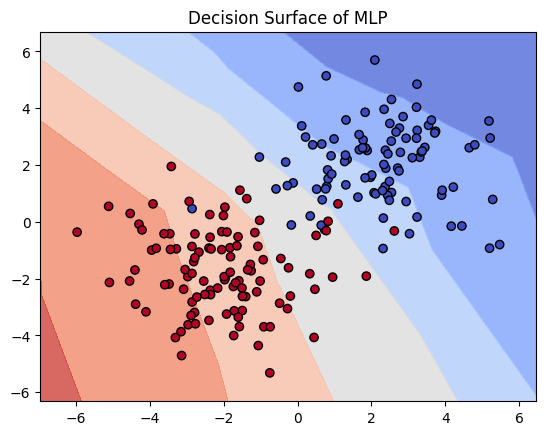

In [340]:
# plot for Decision surface
def plot_decision_surface_pytorch(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid).cpu().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Decision Surface of MLP")
    plt.show()

plot_decision_surface_pytorch(model, X_train.numpy(), y_train.numpy())

In [341]:
# Evaluatation on test data
model.eval()
with torch.no_grad():
    output_test = model(X_test)
    test_loss = criterion(output_test, y_test)
    test_acc = ((output_test > 0.5).float() == y_test).float().mean()
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.3649, Test Accuracy: 0.9750


This is the plot showing the Decision surface of a normal Multi-Layer Perceptron (MLP), which is trained on an XOR dataset. Basically XOR dataset is a non linearly separable mean that we can't draw a straight line for separating two different classes. It would not be possible with a single-layer perceptron or linear model.  

Here in the plot MLP has tried to form somewhat curved decision boundary to separate the two classes, eventhough it is not separated perfectly. The blue and red regions represent the areas where the model classifies points as belonging to one class or the other. Also the model is captured the shape of the XOR function, separating the upper-right and lower-left clusters (belonging to one class) from the upper-left and lower-right clusters (belonging to the other class).

The decision boundary is relatively smooth, indicating that the model learned to classify the XOR dataset without overfitting excessively.MLP has learned to separate the classes, but there may still be some misclassifications along the boundary, especially in regions where the two classes are closer together.

**b) MLP w/ L1 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)**


In [342]:
# Train-validation-test split (60% train, 20% validation, 20% test)
train_size = int(0.6 * n_samples)
val_size = int(0.2 * n_samples)

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Reshape for BCELoss
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [343]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(2, 16)  # Increased width for better capacity
        self.layer2 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.output(x))
        return x

model = MLP()
print(model)

MLP(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [344]:
criterion = nn.BCELoss()

# Define L1 regularization function
def l1_regularization(model, lambda_l1):
    l1_norm = sum(torch.norm(param, 1) for param in model.parameters())
    return lambda_l1 * l1_norm

In [345]:
# Initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Set the range for penalty coefficients
l1_penalty_coefficients = [0.0, 0.001, 0.01, 0.1]
best_val_loss = float('inf')
best_lambda = 0.0

# Training loop for hyperparameter tuning
epochs = 300
for lambda_l1 in l1_penalty_coefficients:
    print(f'Training with L1 penalty coefficient: {lambda_l1}')

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)

        # Compute loss with L1 regularization
        loss = criterion(output, y_train) + l1_regularization(model, lambda_l1)
        loss.backward()
        optimizer.step()

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_loss = criterion(val_output, y_val) + l1_regularization(model, lambda_l1)

    print(f'Validation Loss for λ={lambda_l1}: {val_loss.item():.4f}')

    # Check if the current validation loss is the best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_lambda = lambda_l1

print(f"Best L1 penalty coefficient: {best_lambda}")


Training with L1 penalty coefficient: 0.0
Validation Loss for λ=0.0: 0.0559
Training with L1 penalty coefficient: 0.001
Validation Loss for λ=0.001: 0.0724
Training with L1 penalty coefficient: 0.01
Validation Loss for λ=0.01: 0.2761
Training with L1 penalty coefficient: 0.1
Validation Loss for λ=0.1: 0.9601
Best L1 penalty coefficient: 0.0


In [346]:
# Train the model with the best lambda
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)

    # Compute loss with L1 regularization
    loss = criterion(output, y_train) + l1_regularization(model, best_lambda)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/300], Loss: 0.3503
Epoch [20/300], Loss: 0.3063
Epoch [30/300], Loss: 0.2644
Epoch [40/300], Loss: 0.2300
Epoch [50/300], Loss: 0.2029
Epoch [60/300], Loss: 0.1820
Epoch [70/300], Loss: 0.1658
Epoch [80/300], Loss: 0.1533
Epoch [90/300], Loss: 0.1434
Epoch [100/300], Loss: 0.1355
Epoch [110/300], Loss: 0.1291
Epoch [120/300], Loss: 0.1239
Epoch [130/300], Loss: 0.1195
Epoch [140/300], Loss: 0.1158
Epoch [150/300], Loss: 0.1126
Epoch [160/300], Loss: 0.1099
Epoch [170/300], Loss: 0.1076
Epoch [180/300], Loss: 0.1056
Epoch [190/300], Loss: 0.1038
Epoch [200/300], Loss: 0.1023
Epoch [210/300], Loss: 0.1009
Epoch [220/300], Loss: 0.0997
Epoch [230/300], Loss: 0.0986
Epoch [240/300], Loss: 0.0976
Epoch [250/300], Loss: 0.0967
Epoch [260/300], Loss: 0.0959
Epoch [270/300], Loss: 0.0951
Epoch [280/300], Loss: 0.0945
Epoch [290/300], Loss: 0.0938
Epoch [300/300], Loss: 0.0933


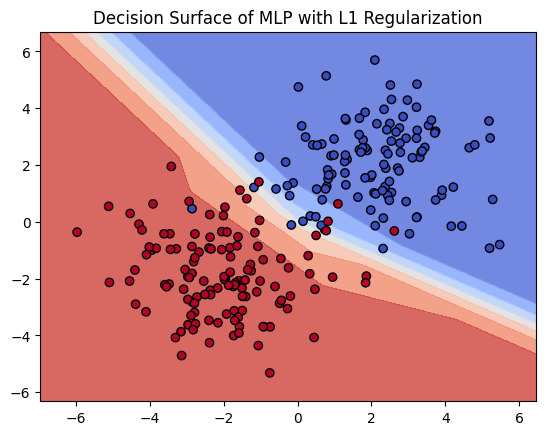

In [347]:
def plot_decision_surface_pytorch(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid).cpu().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Decision Surface of MLP with L1 Regularization")
    plt.show()

plot_decision_surface_pytorch(model, X_train.numpy(), y_train.numpy())

In [348]:
# Evaluate on test data
model.eval()
with torch.no_grad():
    output_test = model(X_test)
    test_loss = criterion(output_test, y_test) + l1_regularization(model, best_lambda)
    test_acc = ((output_test > 0.5).float() == y_test).float().mean()
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0490, Test Accuracy: 0.9875


This plot shows the decision surface of an MLP with L1 regularization applied. L1 regularization encourages sparsity in the model weights, which can simplify the model and prevent it from overfitting.

The decision boundary is smoother and less complex than the one without regularization, with a more gradual transition between regions of different classifications. The L1 regularization has limited the model's capacity to fit overly complex boundaries, leading to a less curvy decision boundary that still manages to capture the XOR structure but in a more generalized manner.
The blue and red regions, representing the two classes, still separate the clusters correctly, although the boundary is less tailored to the exact distribution of the points.

The L1 regularization has reduced some of the flexibility seen in the standard MLP, making the model slightly less sensitive to the finer details in the data.
While this smoother boundary might help reduce overfitting, it may also lead to some slight underfitting, particularly near the boundary where the two classes meet. Misclassifications could occur in these areas where the model's flexibility is restricted.

**c) MLP w/ L2 regularization (you may vary the penalty coefficient by choose the best one using a validation dataset)**

In [349]:
# Define Binary Cross-Entropy Loss
criterion = nn.BCELoss()

# Initialize the optimizer
l2_penalty_coefficients = [0.0, 0.0001, 0.001, 0.01, 0.1]
best_val_loss = float('inf')
best_lambda = 0.0

In [350]:
# Train the model with L2 regularization (weight decay)
epochs = 300  #

for lambda_l2 in l2_penalty_coefficients:
    # Set up optimizer with the current L2 penalty coefficient as weight decay
    optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=lambda_l2)

    print(f'Training with L2 penalty coefficient (weight decay): {lambda_l2}')

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)

        # Compute loss
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_output = model(X_val)
        val_loss = criterion(val_output, y_val)

    print(f'Validation Loss for λ={lambda_l2}: {val_loss.item():.4f}')

    # Check if the current validation loss is the best
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_lambda = lambda_l2

Training with L2 penalty coefficient (weight decay): 0.0
Validation Loss for λ=0.0: 0.1165
Training with L2 penalty coefficient (weight decay): 0.0001
Validation Loss for λ=0.0001: 0.1470
Training with L2 penalty coefficient (weight decay): 0.001
Validation Loss for λ=0.001: 0.0617
Training with L2 penalty coefficient (weight decay): 0.01
Validation Loss for λ=0.01: 0.0398
Training with L2 penalty coefficient (weight decay): 0.1
Validation Loss for λ=0.1: 0.1238


In [351]:
# Retrain with the best L2 penalty coefficient
print(f"Best L2 penalty coefficient (weight decay): {best_lambda}")

# Reinitialize optimizer with the best penalty coefficient
optimizer = optim.Adam(model.parameters(), lr=0.005, weight_decay=best_lambda)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)

    # Compute loss
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Best L2 penalty coefficient (weight decay): 0.01
Epoch [10/300], Loss: 0.1103
Epoch [20/300], Loss: 0.0937
Epoch [30/300], Loss: 0.0912
Epoch [40/300], Loss: 0.0906
Epoch [50/300], Loss: 0.0907
Epoch [60/300], Loss: 0.0903
Epoch [70/300], Loss: 0.0897
Epoch [80/300], Loss: 0.0894
Epoch [90/300], Loss: 0.0892
Epoch [100/300], Loss: 0.0890
Epoch [110/300], Loss: 0.0888
Epoch [120/300], Loss: 0.0886
Epoch [130/300], Loss: 0.0884
Epoch [140/300], Loss: 0.0883
Epoch [150/300], Loss: 0.0882
Epoch [160/300], Loss: 0.0881
Epoch [170/300], Loss: 0.0880
Epoch [180/300], Loss: 0.0879
Epoch [190/300], Loss: 0.0878
Epoch [200/300], Loss: 0.0878
Epoch [210/300], Loss: 0.0877
Epoch [220/300], Loss: 0.0877
Epoch [230/300], Loss: 0.0876
Epoch [240/300], Loss: 0.0876
Epoch [250/300], Loss: 0.0876
Epoch [260/300], Loss: 0.0876
Epoch [270/300], Loss: 0.0876
Epoch [280/300], Loss: 0.0876
Epoch [290/300], Loss: 0.0876
Epoch [300/300], Loss: 0.0876


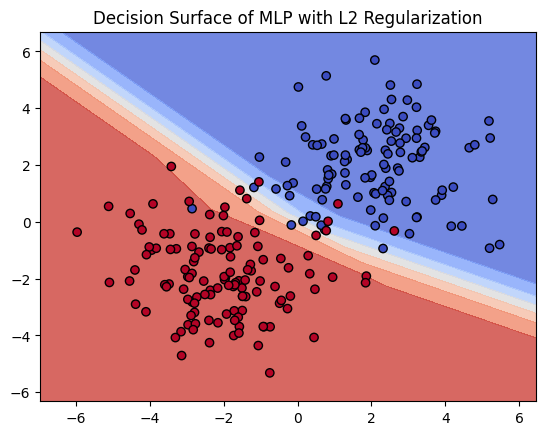

In [352]:
# Plot for decision surface
def plot_decision_surface_pytorch(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid).cpu().numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.title("Decision Surface of MLP with L2 Regularization")
    plt.show()

plot_decision_surface_pytorch(model, X_train.numpy(), y_train.numpy())

In [353]:
# Evaluate on test data
model.eval()
with torch.no_grad():
    output_test = model(X_test)
    test_loss = criterion(output_test, y_test)
    test_acc = ((output_test > 0.5).float() == y_test).float().mean()
    print(f"Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.0420, Test Accuracy: 0.9875


This plot shows the decision surface of an MLP with L2 regularization applied.

In this plot the decision boundary is again smooth and slightly simpler than the standard MLP, but it retains more flexibility than with L1 regularization. The boundary is less sharp, with a smoother gradient between the two classes.

The MLP with L2 regularization achieves a good balance between flexibility and generalization. It captures the XOR structure effectively with a smooth and simplified decision boundary, minimizing the risk of overfitting while maintaining accuracy. This makes L2 regularization a useful choice for improving the generalization of models on non-linear XOR without losing too much detail in the decision boundary.




**d) Learn logistic regression models on the same data with additional features (such as x1*x2, x1^2, etc.)**

In [374]:
from sklearn.preprocessing import PolynomialFeatures
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate degree-3 polynomial features for better separation
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train.numpy())
X_test_poly = poly.transform(X_test.numpy())

# Convert polynomial features to PyTorch tensors
X_train_poly_tensor = torch.tensor(X_train_poly, dtype=torch.float32)
X_test_poly_tensor = torch.tensor(X_test_poly, dtype=torch.float32)

# Convert labels to tensors with correct shape
y_train_tensor = torch.tensor(y_train.numpy(), dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.numpy(), dtype=torch.float32).view(-1, 1)

print("X_train_poly_tensor shape:", X_train_poly_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)


X_train_poly_tensor shape: torch.Size([240, 9])
y_train_tensor shape: torch.Size([240, 1])


In [375]:
class LogisticRegressionPoly(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionPoly, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

# Initialize the logistic regression model
log_reg_model = LogisticRegressionPoly(X_train_poly.shape[1])


In [376]:
# Set up optimizer and loss function
optimizer = optim.Adam(log_reg_model.parameters(), lr=0.01)

# Training loop for logistic regression with polynomial features
epochs = 500
for epoch in range(epochs):
    log_reg_model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = log_reg_model(X_train_poly_tensor)

    # Compute loss
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Print loss every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")


Epoch [0/500], Loss: 0.6304
Epoch [50/500], Loss: 0.1115
Epoch [100/500], Loss: 0.1024
Epoch [150/500], Loss: 0.0972
Epoch [200/500], Loss: 0.0934
Epoch [250/500], Loss: 0.0906
Epoch [300/500], Loss: 0.0885
Epoch [350/500], Loss: 0.0867
Epoch [400/500], Loss: 0.0854
Epoch [450/500], Loss: 0.0843


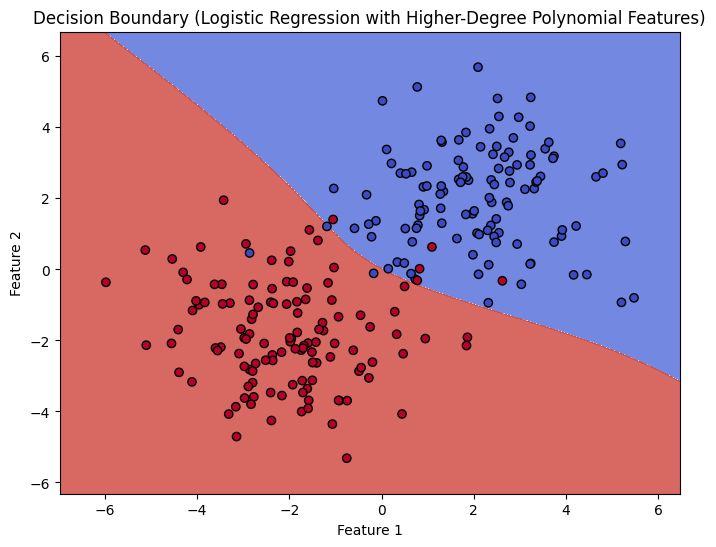

In [380]:
def plot_decision_surface_with_poly(model, X, y, poly_transformer):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Apply polynomial transformation to the grid
    grid = poly_transformer.transform(np.c_[xx.ravel(), yy.ravel()])
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    # Predict on the grid
    with torch.no_grad():
        Z = model(grid_tensor).cpu().numpy()
    Z = Z.reshape(xx.shape)

    # Classify the grid points based on 0.5 threshold
     # Convert probabilities to class labels
    Z_class = (Z > 0.5).astype(int)

    # Plot decision boundary and scatter plot of training data
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_class, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='coolwarm')
    plt.title("Decision Boundary (Logistic Regression with Higher-Degree Polynomial Features)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision surface
plot_decision_surface_with_poly(log_reg_model, X_train.numpy(), y_train.numpy(), poly)


This plot shows the decision boundary for a logistic regression model with polynomial features on the XOR dataset.By adding polynomial features (e.g., x1*x2 etc.), logistic regression can create a more complex boundary than linear logistic regression would typically allow. This enables it to separate the red and blue classes effectively.

The model achieves a good decision boundary that distinguishes the classes well, with red regions for one class and blue regions for the other. However, compared to other models like a Multi-Layer Perceptron (MLP), the polynomial logistic regression model might still be limited in flexibility for highly complex patterns beyond XOR.